## Spotify Project WalkThrough
This notebook walks through some of the minmal data that I'm sharing with you.  There's plenty of  opportunity for you to pull new, better data, but remember, most of the project rubric is NOT about getting new additional data. It's about creative modeling! So don't waste too much time looking for data. 

In [12]:
import pandas as pd
import numpy as np 

## About the Artist Dataset

This dataset was taken from [Kaggle](https://www.kaggle.com/datasets/pieca111/music-artists-popularity). According to the description:

> "The dataset consists of over 1.4 Million musical artists present in the MusicBrainz database — their names, tags, and popularity (listeners/scrobbles), based on data scraped from Last.fm."

In other words, the dataset combines information from two sources:
- **MusicBrainz**: an open, free database of musical metadata
- **Last.fm**: a music tracking platform that provides information on user engagement

As a side note: **MusicBrainz** contains much more data than what we’re using here — it's a great resource if you're curious about metadata like albums, releases, or recording info.  

For reference, **"scrobbles"** is Last.fm's term for a user listening to a track. So, artists with many scrobbles are likely to be more popular.


In [13]:
#load up the artists dataset
df_artists = pd.read_csv('artists.csv')
df_artists.head()

/var/folders/1_/cvqdk98d04sb3c56p6sp78r00000gn/T/ipykernel_3263/3112619843.py:2: DtypeWarning: Columns (2,4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df_artists = pd.read_csv('artists.csv')


,mbid,artist_mb,artist_lastfm,country_mb,country_lastfm,tags_mb,tags_lastfm,listeners_lastfm,scrobbles_lastfm,ambiguous_artist
0,cc197bad-dc9c-440d-a5b5-d52ba2e14234,Coldplay,Coldplay,United Kingdom,United Kingdom,rock; pop; alternative rock; british; uk; brit...,rock; alternative; britpop; alternative rock; ...,5381567.0,360111850.0,False
1,a74b1b7f-71a5-4011-9441-d0b5e4122711,Radiohead,Radiohead,United Kingdom,United Kingdom,rock; electronic; alternative rock; british; g...,alternative; alternative rock; rock; indie; el...,4732528.0,499548797.0,False
2,8bfac288-ccc5-448d-9573-c33ea2aa5c30,Red Hot Chili Peppers,Red Hot Chili Peppers,United States,United States,rock; alternative rock; 80s; 90s; rap; metal; ...,rock; alternative rock; alternative; Funk Rock...,4620835.0,293784041.0,False
3,73e5e69d-3554-40d8-8516-00cb38737a1c,Rihanna,Rihanna,United States,Barbados; United States,pop; dance; hip hop; reggae; contemporary r b;...,pop; rnb; female vocalists; dance; Hip-Hop; Ri...,4558193.0,199248986.0,False
4,b95ce3ff-3d05-4e87-9e01-c97b66af13d4,Eminem,Eminem,United States,United States,turkish; rap; american; hip-hop; hip hop; hiph...,rap; Hip-Hop; Eminem; hip hop; pop; american; ...,4517997.0,199507511.0,False


---

## Songs and Ratings

Spotify uses sophisticated analytics to predict how much a user will enjoy a particular song. This is a hard problem for several reasons:

- There are **a ton of users**
- There are **a ton of songs**
- We might need to make predictions for users who haven’t listened to much music (especially not the song or artist in question)
- Just listening to a song doesn't always mean the user **likes** it

Fortunately for you, I’ve already built some predictions for specific **user–song pairs** using a collaborative filtering model.


### Description of the Data

The main song dataframe is shown below. It includes:
- The song title and artist name
- A predicted score for **each user**
- An **average score** across all users

> **Note**: If you see a score of `0.000`, it means the model couldn’t reliably make a prediction — usually because very few users (or none) have ever listened to that song before. These songs are important! They often represent **unfamiliar or lesser-known tracks**, which are great candidates for surfacing new and fresh recommendations.

---

### 🧪 Optional: How Were These Ratings Computed?

These scores weren’t produced by Spotify’s proprietary model — instead, I built a simplified system using public data.

The base dataset came from [this Kaggle source](https://www.kaggle.com/datasets/andrewmvd/spotify-playlists):

> "This dataset is based on the subset of users in the #nowplaying dataset who publish their #nowplaying tweets via Spotify. In principle, the dataset holds users, their playlists, and the tracks contained in these playlists."

In other words, the dataset is:
- **Biased** toward users who use the “#nowplaying” tweet feature
- Reflective of songs that users **added to playlists**, which may indicate preference

From there, I fit a collaborative filtering model, performed additional data cleaning, and generated predictions for a large set of users and songs. I then **subsampled** this data down to:
- ~20 users
- ~20,000 songs
As you see below, the first columns correspond to 
 - track_name
 - artist_name
 - mbid -- this is the MusicBrains ID for the artist (it's a unique ID used by MusicBrainz)

The next set of columns all look like "user_XXXX" and correspond to the user ratings for indivdiual users.  The last column gives the average_prediction.

I was mostly inspired by the code [here](https://colab.research.google.com/github/Gurobi/modeling-examples/blob/master/music_recommendation/music_recommendation.ipynb#scrollTo=kztrexxASugU).  If you take a look at that link, you can see how the collaborative filtering was run (for artists, not songs) and you'll actually see a pretty basic model for thinking about how to use this data to make a playlist.  (I expect you guys will develop even more creative/exciting models!)  


In [14]:
#load up the songs_with_predictions_small.csv datasset
df_songs = pd.read_csv('songs_with_predictions_small.csv')
df_songs.head()


,track_name,artist_name,mbid,user_b4beed9bf653604a876fdfd9df59e19c,user_5c0cba28e67a99c235ef2ba9877fef44,user_3f8fd0d54f6f43ddce16c3d125dc640e,user_7c239807289a677c0ca4b220474dcf75,user_9c91d35a30b8fb61a04ef2711cb2c3b4,user_acb4965613fe484786942bba8b23ff24,user_8c13829fe6af09f5c7bcc492ef061c17,...,user_df486328a5745236ce5e9795b545ef33,user_52d6617fa785b088a0e058e9d7f394e5,user_9fba4899816193812d39288ccba4c603,user_9139c0d2effabdff39ef862e3c7289d1,user_a03045cd25d8a0a28a51c60fa7afe312,user_7391a216d4212b84c0a144479ddb1871,user_f9a8bd267b4030e0c2da5a99539bf1b6,user_5b96d1a747822774a342ea1b6d8a049b,user_ad3922719c2403f00f1bb9952e2666cf,average_prediction
0,Ojala no te hubiera conocido nunca,Muchachito Bombo Infierno,a059eb85-58fd-4afd-9379-84ba9f3528f4,-2.827274,-1.942740,-2.456942,-2.140597,-2.731836,-2.752550,-2.973834,...,-1.909080,-1.438773,-3.081193,-1.971504,-1.440524,-2.703026,-2.398776,-2.807253,-3.054588,-2.351901
1,Stay (Filtercrush Remix),Rihanna,73e5e69d-3554-40d8-8516-00cb38737a1c,-0.380760,1.044301,0.367480,0.567396,0.197171,-0.344956,-0.251282,...,0.993514,1.790580,-0.359358,1.134012,1.812616,0.232916,0.000137,-0.347840,-0.485449,0.405020
2,Track 01,The Black Keys,d15721d8-56b4-453d-b506-fc915b14cba2,-0.257391,0.491234,-0.018684,0.526424,-0.202791,-0.100100,-0.033777,...,0.771275,0.981239,-0.313880,0.543921,1.072769,-0.328388,0.148829,-0.087015,-0.351728,0.264162
3,We Never Change,Coldplay,cc197bad-dc9c-440d-a5b5-d52ba2e14234,-0.055774,1.060245,0.523356,0.780496,0.317537,-0.015196,0.093891,...,1.230177,1.670586,-0.034522,1.145638,1.588869,0.271424,0.322336,0.049486,-0.131797,0.614328
4,Off,Frightened Rabbit,dc21d171-7204-4759-9fd0-77d031aeb40c,-1.988492,-1.180732,-1.765149,-1.171558,-1.954787,-1.832077,-1.890811,...,-0.917144,-0.731461,-2.228167,-1.184932,-0.659285,-2.255282,-1.656913,-1.983307,-2.190738,-1.515567


In [15]:
#sort the dataframe by the average prediction
df_songs_sorted = df_songs.sort_values(by='average_prediction', ascending=False)
df_songs_sorted.head()

,track_name,artist_name,mbid,user_b4beed9bf653604a876fdfd9df59e19c,user_5c0cba28e67a99c235ef2ba9877fef44,user_3f8fd0d54f6f43ddce16c3d125dc640e,user_7c239807289a677c0ca4b220474dcf75,user_9c91d35a30b8fb61a04ef2711cb2c3b4,user_acb4965613fe484786942bba8b23ff24,user_8c13829fe6af09f5c7bcc492ef061c17,...,user_df486328a5745236ce5e9795b545ef33,user_52d6617fa785b088a0e058e9d7f394e5,user_9fba4899816193812d39288ccba4c603,user_9139c0d2effabdff39ef862e3c7289d1,user_a03045cd25d8a0a28a51c60fa7afe312,user_7391a216d4212b84c0a144479ddb1871,user_f9a8bd267b4030e0c2da5a99539bf1b6,user_5b96d1a747822774a342ea1b6d8a049b,user_ad3922719c2403f00f1bb9952e2666cf,average_prediction
3149,Make Love (Chew Fu and Substantial Small Room ...,Daft Punk,056e4f3e-d505-4dad-8ec1-d04f521cbb56,0.107577,1.139843,0.498584,0.979419,0.280398,0.198692,0.281600,...,1.347497,1.577022,0.077852,1.200051,1.864102,0.224794,0.472555,0.260785,0.002677,0.741525
13592,Too Long/Steam Machine,Daft Punk,056e4f3e-d505-4dad-8ec1-d04f521cbb56,0.110151,1.141370,0.496086,0.920677,0.293125,0.195726,0.326667,...,1.410523,1.709187,0.085510,1.025139,1.801261,0.222306,0.518686,0.235234,0.002815,0.735517
16379,Flynn's Dream (Unreleased),Daft Punk,056e4f3e-d505-4dad-8ec1-d04f521cbb56,0.117228,1.120087,0.535991,1.003662,0.317345,0.187792,0.302752,...,1.321163,1.709245,0.085639,1.144839,1.772830,0.225794,0.464330,0.248093,0.002938,0.735016
1204,Music Sounds Better With You,Daft Punk,056e4f3e-d505-4dad-8ec1-d04f521cbb56,0.110848,1.167349,0.510242,0.899090,0.309182,0.176323,0.315798,...,1.324222,1.688272,0.086693,1.183020,1.765611,0.221055,0.506912,0.224462,0.002574,0.734176
13102,Father and Son (Film Version),Daft Punk,056e4f3e-d505-4dad-8ec1-d04f521cbb56,0.103878,1.048124,0.502262,1.002957,0.298468,0.199628,0.297631,...,1.334861,1.780698,0.075428,1.114834,1.696533,0.246297,0.518434,0.241295,0.002812,0.733990


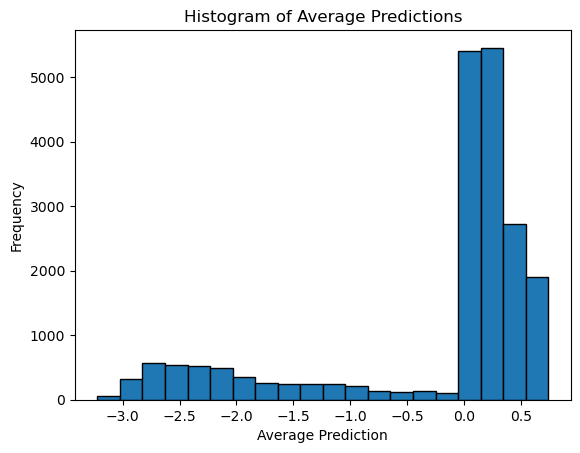

In [16]:
#plot a histogram of the average predictiosn from df_songs

import matplotlib.pyplot as plt
plt.hist(df_songs_sorted['average_prediction'], bins=20, edgecolor='black')
plt.title('Histogram of Average Predictions')
plt.xlabel('Average Prediction')
plt.ylabel('Frequency')
plt.show()

In [17]:
#compute the minimum and maximum average predictions
min_avg_prediction = df_songs_sorted['user_b4beed9bf653604a876fdfd9df59e19c'].min()
max_avg_prediction = df_songs_sorted['user_b4beed9bf653604a876fdfd9df59e19c'].max()
print(f'Minimum  Prediction: {min_avg_prediction}')
print(f'Maximum  Prediction: {max_avg_prediction}')

Minimum  Prediction: -4.08686583775654
Maximum  Prediction: 0.1279786049101021


## Building an Optimization Model
Ok, you're turn!  let's start by building a very simple optimization model that will generate a playlist for user 
 - user_5b96d1a747822774a342ea1b6d8a049b

 The playlist should have 20 songs on it.

And we might try to maximize the number of songs the user likes on the playlist. 

In [18]:
from gurobipy import Model, GRB, quicksum
songs_dict = df_songs.to_dict(orient="list")

target_user = "user_5c0cba28e67a99c235ef2ba9877fef44"
ratings = songs_dict[target_user]
ratings

track_names = songs_dict['track_name']
num_tracks = len(track_names)

artists = songs_dict['artist_name']
unique_artists = list(set(artists))

In [19]:
m = Model("Music_Recommendation")

# Create binary variables for each track
x = m.addVars(num_tracks, vtype=GRB.BINARY, name="x")
# Set the objective to maximize the average prediction
m.setObjective(quicksum(ratings[i] * x[i] for i in range(num_tracks)), GRB.MAXIMIZE)

# Add a constraint to select exactly 20 tracks
m.addConstr(quicksum(x[i] for i in range(num_tracks)) == 20, "num_tracks")

# Optimize the model
m.optimize()


Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[x86] - Darwin 23.6.0 23G93)

CPU model: Intel(R) Core(TM) i7-1068NG7 CPU @ 2.30GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 1 rows, 20000 columns and 20000 nonzeros
Model fingerprint: 0x2b24c004
Variable types: 0 continuous, 20000 integer (20000 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-04, 3e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+01, 2e+01]
Found heuristic solution: objective -3.8511943
Presolve removed 0 rows and 9671 columns
Presolve time: 0.06s
Presolved: 1 rows, 10329 columns, 10329 nonzeros
Found heuristic solution: objective 21.8897481
Variable types: 0 continuous, 10329 integer (10268 binary)
Found heuristic solution: objective 22.3224202

Root relaxation: objective 2.572550e+01, 1 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work


In [20]:
#print the selected tracks
selected_tracks_indices = [i for i in range(num_tracks) if x[i].X > 0.5]

#create a dataframe with the selected tracks
selected_tracks = df_songs.iloc[selected_tracks_indices].copy()

selected_tracks.sort_values(by=target_user, ascending=False, inplace=True)
selected_tracks 

,track_name,artist_name,mbid,user_b4beed9bf653604a876fdfd9df59e19c,user_5c0cba28e67a99c235ef2ba9877fef44,user_3f8fd0d54f6f43ddce16c3d125dc640e,user_7c239807289a677c0ca4b220474dcf75,user_9c91d35a30b8fb61a04ef2711cb2c3b4,user_acb4965613fe484786942bba8b23ff24,user_8c13829fe6af09f5c7bcc492ef061c17,...,user_df486328a5745236ce5e9795b545ef33,user_52d6617fa785b088a0e058e9d7f394e5,user_9fba4899816193812d39288ccba4c603,user_9139c0d2effabdff39ef862e3c7289d1,user_a03045cd25d8a0a28a51c60fa7afe312,user_7391a216d4212b84c0a144479ddb1871,user_f9a8bd267b4030e0c2da5a99539bf1b6,user_5b96d1a747822774a342ea1b6d8a049b,user_ad3922719c2403f00f1bb9952e2666cf,average_prediction
19426,Lovers In Japan (Acoustic Version),Coldplay,cc197bad-dc9c-440d-a5b5-d52ba2e14234,-0.051434,1.329584,0.528964,0.932216,0.291404,-0.014872,0.094668,...,1.223740,1.890801,-0.036359,1.144039,1.743839,0.324575,0.362790,0.053370,-0.134987,0.658101
1480,Trouble (Remix),Coldplay,cc197bad-dc9c-440d-a5b5-d52ba2e14234,-0.055733,1.321176,0.509208,0.804204,0.329933,-0.014947,0.092612,...,1.263285,1.732720,-0.038338,1.128331,1.736029,0.291705,0.367209,0.051961,-0.125137,0.640512
2540,Every Teardrop Is a Waterfall (Live),Coldplay,cc197bad-dc9c-440d-a5b5-d52ba2e14234,-0.056266,1.315699,0.511300,0.871659,0.310980,-0.014655,0.084173,...,1.264798,1.672048,-0.038781,1.188348,1.809356,0.286329,0.333881,0.050870,-0.123803,0.649655
13005,Glass Of Water [Live],Coldplay,cc197bad-dc9c-440d-a5b5-d52ba2e14234,-0.058762,1.310376,0.479100,0.777385,0.307175,-0.015305,0.091337,...,1.345525,1.619993,-0.040817,1.158452,1.662524,0.317879,0.352817,0.052159,-0.129681,0.639178
16115,Amsterdam (2002),Coldplay,cc197bad-dc9c-440d-a5b5-d52ba2e14234,-0.055859,1.306601,0.483534,0.913909,0.323546,-0.015891,0.090802,...,1.300966,1.942158,-0.037388,1.266648,1.674166,0.286319,0.339339,0.055108,-0.134693,0.665703
11666,Atlas - From “The Hunger Games: Catching Fire”...,Coldplay,cc197bad-dc9c-440d-a5b5-d52ba2e14234,-0.054927,1.301609,0.499067,0.896623,0.335553,-0.014444,0.092469,...,1.173828,1.823664,-0.036443,1.227929,1.668547,0.265308,0.357943,0.054260,-0.127066,0.640055
4735,sparks,Coldplay,cc197bad-dc9c-440d-a5b5-d52ba2e14234,-0.056277,1.295006,0.468270,0.876882,0.294771,-0.014053,0.091581,...,1.239743,1.692542,-0.036660,1.257872,1.735603,0.289407,0.343861,0.057880,-0.122554,0.638093
11204,Speed Of Sound - Live,Coldplay,cc197bad-dc9c-440d-a5b5-d52ba2e14234,-0.054310,1.282036,0.478602,0.847576,0.306846,-0.015473,0.093067,...,1.356420,1.695441,-0.039160,1.121049,1.715511,0.300077,0.357550,0.050220,-0.129653,0.643416
14289,Everything's Not Lost - Includes Hidden Track ...,Coldplay,cc197bad-dc9c-440d-a5b5-d52ba2e14234,-0.056113,1.280528,0.486132,0.841521,0.300177,-0.015339,0.092336,...,1.229442,1.867664,-0.035183,1.246794,1.584643,0.280143,0.371898,0.050235,-0.124710,0.643174
18717,Lost+ (With Jay-Z),Coldplay,cc197bad-dc9c-440d-a5b5-d52ba2e14234,-0.058254,1.277970,0.492796,0.959758,0.308091,-0.013955,0.090443,...,1.067002,1.785458,-0.037495,1.229277,1.845574,0.309693,0.342746,0.049297,-0.130024,0.649626


### What's going wrong?
Can you think of a simple way to adjust your optimization model to correct for this?

In [21]:
#we're going to build a function that creates the playlist for a given weight w
# For efficiency ,we'll build the model outside the function once, and then just change the objective each time we call the function

#create a new model
m = Model("Music_Recommendation_Better")
# Create binary variables for each track
z = m.addVars(num_tracks, vtype=GRB.BINARY, name="z")

#create a binary variable for each unique artist
x = m.addVars(unique_artists, vtype=GRB.BINARY, name="artist")

m.addConstr(quicksum(z[i] for i in range(num_tracks)) == 20, "num_tracks")

for artist in unique_artists:
    m.addConstr(x[artist] <= 
                quicksum(z[i] for i in range(num_tracks) if artists[i] == artist),
                f"artist_{artist}")




def solve_for_weight(w, m):        
    m.setObjective( w * quicksum(ratings[i] * z[i] for i in range(num_tracks)) +
                    (1 - w) * quicksum(x[artist] for artist in unique_artists), 
                    GRB.MAXIMIZE)
    m.optimize()

    total_rating = sum(ratings[i] * z[i].X for i in range(num_tracks))
    num_artists = sum(x[artist].X for artist in unique_artists)
    selected_tracks = [track_names[i] for i in range(num_tracks) if z[i].X > 0.5]

    return total_rating, num_artists, selected_tracks

solve_for_weight(0.1, m)

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[x86] - Darwin 23.6.0 23G93)

CPU model: Intel(R) Core(TM) i7-1068NG7 CPU @ 2.30GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 7481 rows, 27480 columns and 47480 nonzeros
Model fingerprint: 0x037eb2df
Variable types: 0 continuous, 27480 integer (27480 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-05, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+01, 2e+01]
Found heuristic solution: objective 15.4162574
Presolve removed 6110 rows and 12667 columns
Presolve time: 0.15s
Presolved: 1371 rows, 14813 columns, 28236 nonzeros
Found heuristic solution: objective 18.0670712
Variable types: 0 continuous, 14813 integer (14386 binary)

Root relaxation: objective 1.987741e+01, 448 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf |

(18.774087613715178,
 20.0,
 ['Young And Beautiful [Lana Del Rey vs. Cedric Gervais] - Cedric Gervais Remix Radio Edit',
  "It's your life (feat. Chris Willis)",
  'Out Of Goodbyes With Lady Antebellum',
  'Points Of Authority 2',
  'Judas - DJ White Shadow Remix',
  'Mannequin',
  'Lover of the Night',
  'My Love - T.I., Justin Timberlake',
  'The Glory - Album Version (Edited)',
  'Red Right Hand',
  'Alone (Glee Cast Version) [feat. Kristin Chenoweth]',
  'We Write The Story - Edited Version',
  'Wheels',
  'Dj Skylat Dope Mix ft.Jamiroquai',
  'Work It Out - New Radio Edit',
  'Dark Horse (feat. TEE)',
  '11 - Life In A Glass House',
  '3 a.m. (Produced By Dr. Dre)',
  "What's My Name (Kik Klap Extended Mix)",
  'Lovers In Japan (Acoustic Version)'])

In [22]:
solve_for_weight(0.1, m)
#print the selected tracks
selected_tracks_indices = [i for i in range(num_tracks) if z[i].X > 0.5]

#create a dataframe with the selected tracks
selected_tracks = df_songs.iloc[selected_tracks_indices].copy()

selected_tracks.sort_values(by=target_user, ascending=False, inplace=True)
selected_tracks 

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[x86] - Darwin 23.6.0 23G93)

CPU model: Intel(R) Core(TM) i7-1068NG7 CPU @ 2.30GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 7481 rows, 27480 columns and 47480 nonzeros
Model fingerprint: 0x037eb2df
Variable types: 0 continuous, 27480 integer (27480 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [3e-05, 9e-01]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+01, 2e+01]

Loaded MIP start from previous solve with objective 19.8774

Presolve removed 6110 rows and 12667 columns
Presolve time: 0.15s
Presolved: 1371 rows, 14813 columns, 28236 nonzeros
Variable types: 0 continuous, 14813 integer (14386 binary)

Root relaxation: cutoff, 448 iterations, 0.01 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     

,track_name,artist_name,mbid,user_b4beed9bf653604a876fdfd9df59e19c,user_5c0cba28e67a99c235ef2ba9877fef44,user_3f8fd0d54f6f43ddce16c3d125dc640e,user_7c239807289a677c0ca4b220474dcf75,user_9c91d35a30b8fb61a04ef2711cb2c3b4,user_acb4965613fe484786942bba8b23ff24,user_8c13829fe6af09f5c7bcc492ef061c17,...,user_df486328a5745236ce5e9795b545ef33,user_52d6617fa785b088a0e058e9d7f394e5,user_9fba4899816193812d39288ccba4c603,user_9139c0d2effabdff39ef862e3c7289d1,user_a03045cd25d8a0a28a51c60fa7afe312,user_7391a216d4212b84c0a144479ddb1871,user_f9a8bd267b4030e0c2da5a99539bf1b6,user_5b96d1a747822774a342ea1b6d8a049b,user_ad3922719c2403f00f1bb9952e2666cf,average_prediction
19426,Lovers In Japan (Acoustic Version),Coldplay,cc197bad-dc9c-440d-a5b5-d52ba2e14234,-0.051434,1.329584,0.528964,0.932216,0.291404,-0.014872,0.094668,...,1.223740,1.890801,-0.036359,1.144039,1.743839,0.324575,0.362790,0.053370,-0.134987,0.658101
15794,Dj Skylat Dope Mix ft.Jamiroquai,Daft Punk,056e4f3e-d505-4dad-8ec1-d04f521cbb56,0.115311,1.245485,0.504059,0.994341,0.308111,0.209880,0.312735,...,1.411027,1.689002,0.080766,0.972412,1.667334,0.227663,0.526330,0.240038,0.002866,0.720671
19252,What's My Name (Kik Klap Extended Mix),Rihanna,73e5e69d-3554-40d8-8516-00cb38737a1c,-0.340553,1.238411,0.399119,0.603766,0.175094,-0.372603,-0.238584,...,1.005038,1.854097,-0.354208,1.056940,1.733482,0.206844,0.000136,-0.325568,-0.468260,0.416633
6699,The Glory - Album Version (Edited),Kanye West,164f0d73-1234-4e2c-8743-d77bf2191051,-0.030781,1.181904,0.579074,0.782051,0.255991,-0.089609,0.126528,...,1.120172,1.584544,-0.074627,1.102453,1.670100,0.209961,0.200556,-0.016486,-0.213617,0.578816
2343,It's your life (feat. Chris Willis),David Guetta,302bd7b9-d012-4360-897a-93b00c855680,-0.364708,1.138525,0.365423,0.513673,0.124154,-0.470158,-0.285294,...,0.991051,1.630709,-0.388150,1.049787,1.720530,0.159878,-0.094323,-0.399739,-0.497676,0.356594
16408,Work It Out - New Radio Edit,Beyoncé,859d0860-d480-4efd-970c-c05d5f1776b8,-0.440344,1.131092,0.357534,0.508884,0.116078,-0.432014,-0.307141,...,0.954467,1.742904,-0.374378,0.990812,1.588321,0.115392,-0.060255,-0.406074,-0.535313,0.337438
18590,3 a.m. (Produced By Dr. Dre),Eminem,b95ce3ff-3d05-4e87-9e01-c97b66af13d4,-0.361912,1.101457,0.393204,0.520987,0.134177,-0.390637,-0.141329,...,0.932618,1.636315,-0.372750,1.010433,1.535193,0.143177,-0.074222,-0.310777,-0.499455,0.376960
3302,Out Of Goodbyes With Lady Antebellum,Maroon 5,0ab49580-c84f-44d4-875f-d83760ea2cfe,-0.574669,1.079023,0.190156,0.396669,0.028119,-0.639442,-0.463465,...,0.813192,1.533442,-0.537278,1.022848,1.646299,0.074680,-0.205547,-0.546291,-0.691130,0.220632
4648,Judas - DJ White Shadow Remix,Lady Gaga,650e7db6-b795-4eb5-a702-5ea2fc46c848,-0.570632,0.964962,0.166333,0.378225,-0.026052,-0.611735,-0.465825,...,0.899194,1.561162,-0.553460,0.911749,1.502690,0.005577,-0.213120,-0.515087,-0.691475,0.206122
16625,Dark Horse (feat. TEE),Katy Perry,122d63fc-8671-43e4-9752-34e846d62a9c,-0.549778,0.932020,0.193100,0.357009,-0.014682,-0.713830,-0.481862,...,0.764513,1.482571,-0.587266,0.822990,1.486859,0.004888,-0.266891,-0.603359,-0.691017,0.161712


## Let's plot the tradeoff curve

In [26]:
weight_grid = np.linspace(0, 1, 51)
total_ratings = np.zeros(len(weight_grid))
num_artists = np.zeros(len(weight_grid))

for i, w in enumerate(weight_grid):
    total_ratings[i], num_artists[i], selected_tracks = solve_for_weight(w, m)
    print(f"Weight: {w}, Total Rating: {total_ratings[i]}, Number of Artists: {num_artists[i]}")

Gurobi Optimizer version 11.0.3 build v11.0.3rc0 (mac64[x86] - Darwin 23.6.0 23G93)

CPU model: Intel(R) Core(TM) i7-1068NG7 CPU @ 2.30GHz
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 7481 rows, 27480 columns and 47480 nonzeros
Model fingerprint: 0x4f657b00
Variable types: 0 continuous, 27480 integer (27480 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+01, 2e+01]

Loaded MIP start from previous solve with objective -0

Presolve removed 7481 rows and 27480 columns
Presolve time: 0.04s
Presolve: All rows and columns removed

Explored 0 nodes (0 simplex iterations) in 0.06 seconds (0.02 work units)
Thread count was 1 (of 8 available processors)

Solution count 2: 20 -0 

Optimal solution found (tolerance 1.00e-04)
Best objective 2.000000000000e+01, best bound 2.000000000000e+01, gap 0.0000%
Weight: 0.0, Total Rating: -10.44310

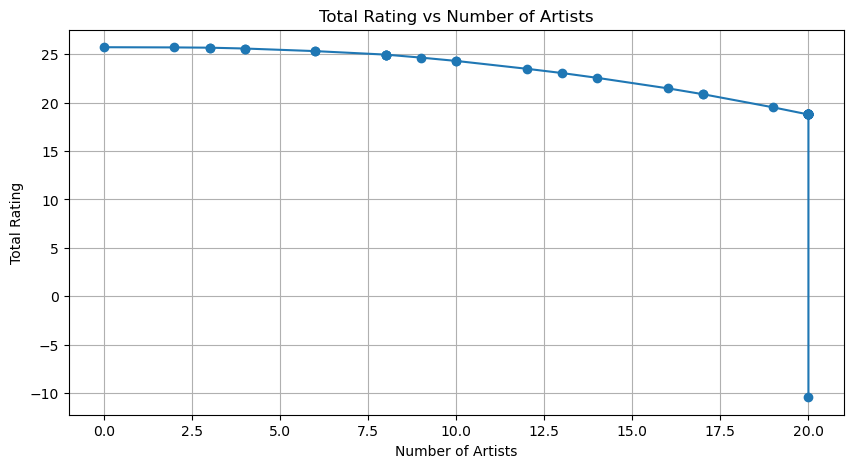

In [27]:
#plot the number of artists vs the total rating
plt.figure(figsize=(10, 5))
plt.plot(num_artists, total_ratings, marker='o')
plt.title('Total Rating vs Number of Artists')
plt.xlabel('Number of Artists')
plt.ylabel('Total Rating')
plt.grid()
plt.show()


In [25]:
df_songs[target_user].groupby(df_songs['artist_name']).mean().sort_values(ascending=False).head()

artist_name
Coldplay        1.163988
Daft Punk       1.093297
Rihanna         1.082612
Kanye West      1.039056
David Guetta    1.004330
Name: user_5c0cba28e67a99c235ef2ba9877fef44, dtype: float64